In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [ ]:
# https://nbviewer.jupyter.org/github/calebmadrigal/FourierTalkOSCON/blob/master/03_FourierTransform.ipynb
# 

In [ ]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

sample_rate=44100, len of signal:86016


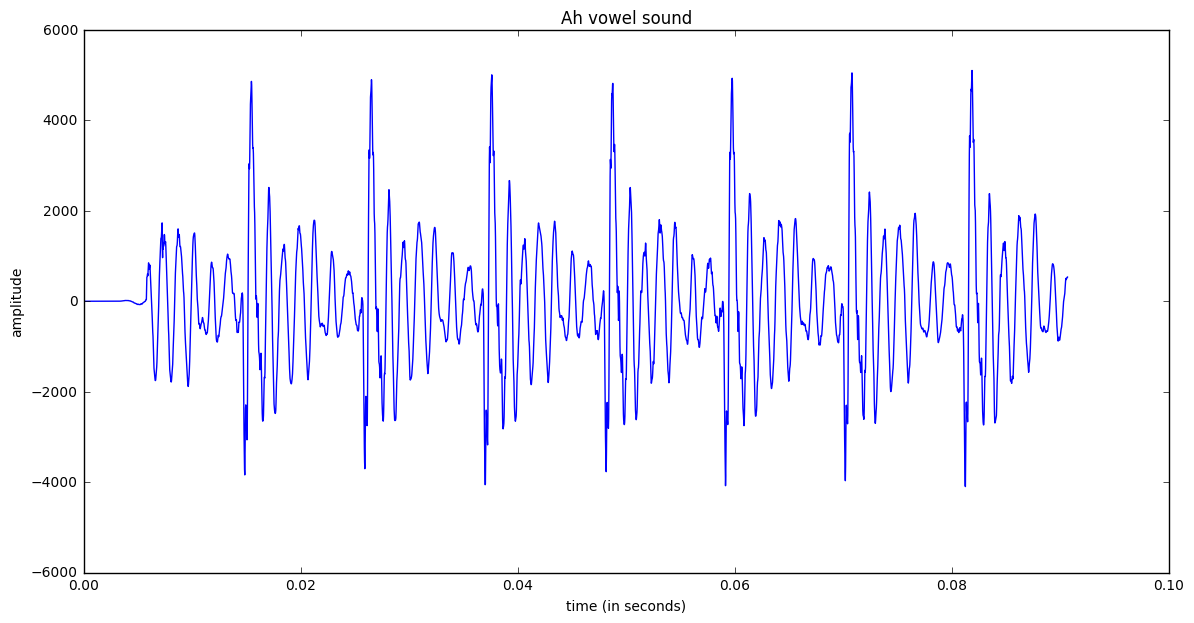

In [42]:
import scipy.io.wavfile

(sample_rate, input_signal) = scipy.io.wavfile.read("audio/vowel_ah.wav")
print ('sample_rate={}, len signal:{}'.format(sample_rate, len(input_signal)))
time_array = np.arange(0, len(input_signal)/sample_rate, 1.0/sample_rate)
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

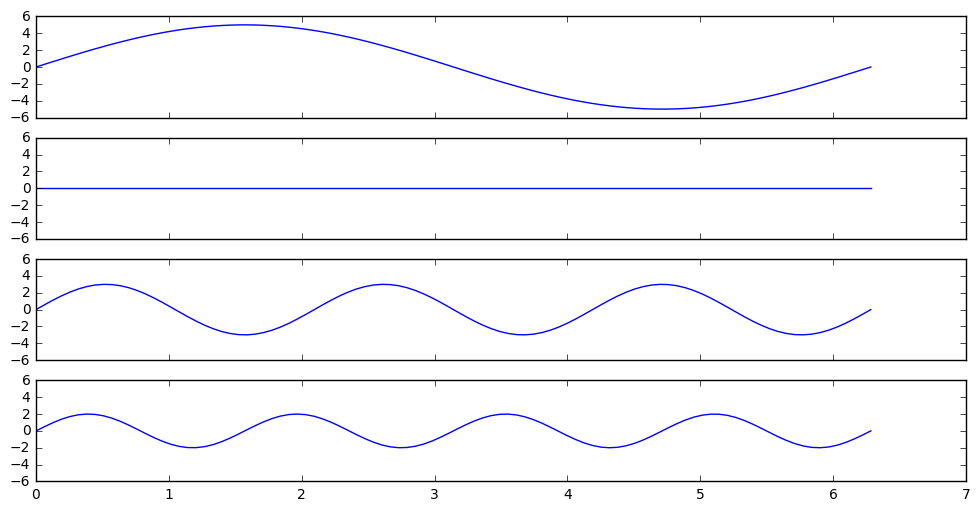

In [44]:
# The Superposition Principle
# Two subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 100)
y1 = 5 * np.sin(x)
y2 = 0 * np.sin(2*x)
y3 = 3 * np.sin(3*x)
y4 = 2 * np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)
_ = plt.show()

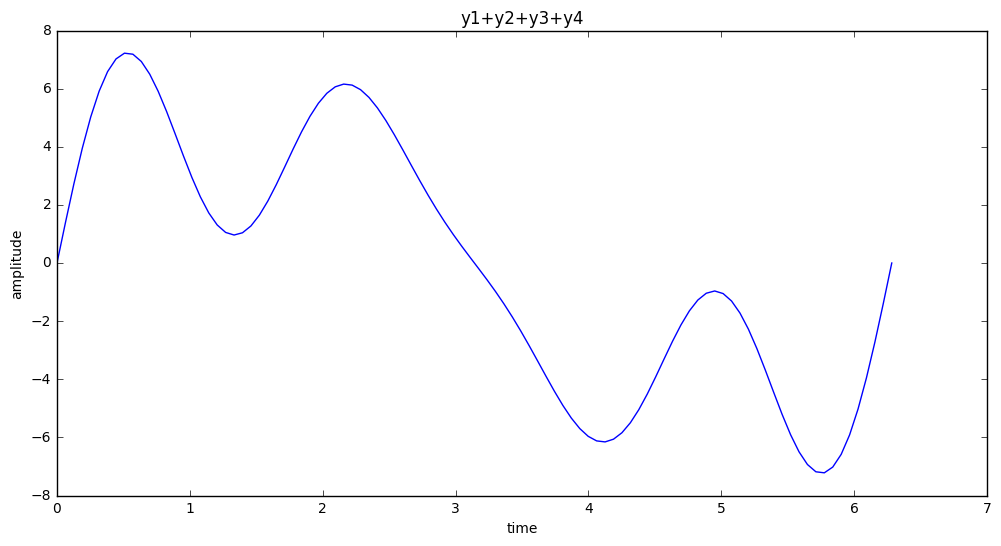

In [45]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', fig_size=(12,6))
convoluted_wave = y1 + y2 + y3 + y4
_ = plt.plot(x, convoluted_wave)

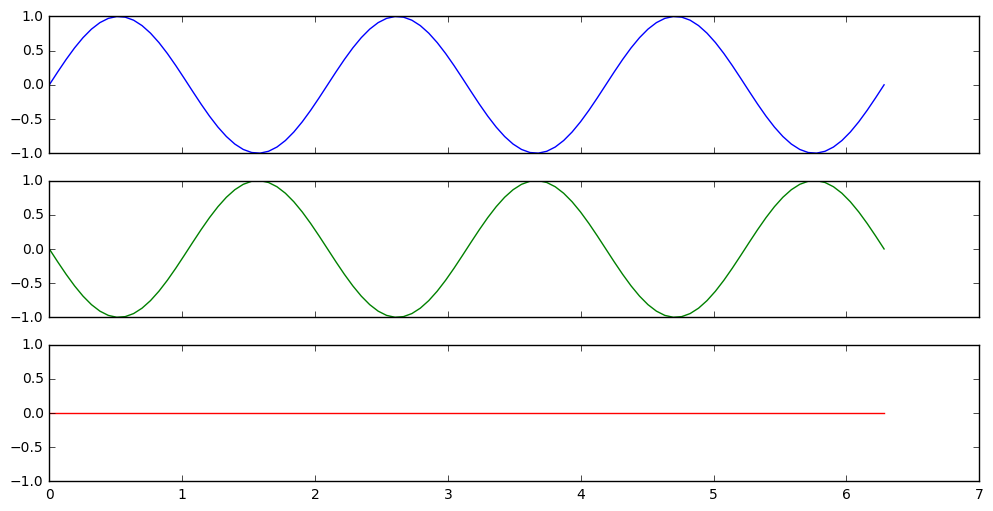

In [47]:
# Wave Interference Example
 
y5 = np.sin(3 * x)
y6 = -1 * np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y6, 'g')
axarr[2].plot(x, y5 + y6, 'r')
_ = plt.show()

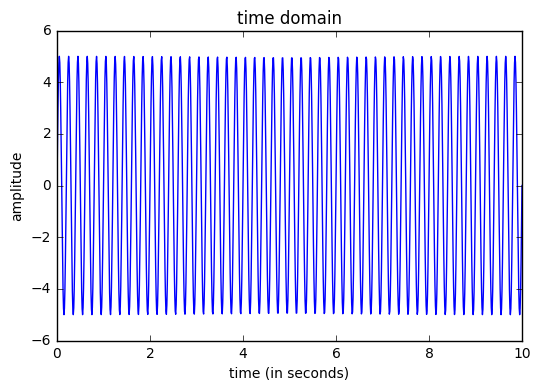

In [24]:

### How to represent waves in time domain

freq = 5 #hz - cycles per second
amplitude = 5
time_to_plot = 10 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples) #start, end, num
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t] # Explain the 2*pi

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

In [14]:
 ### Convert to the Frequency Domain

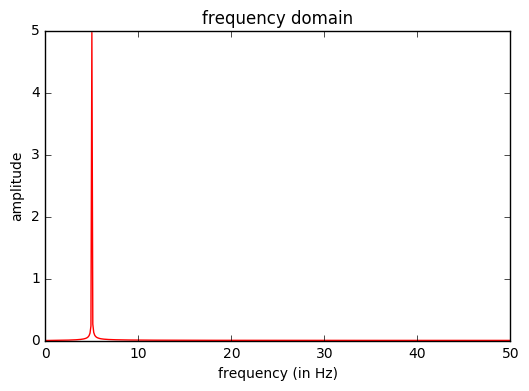

In [25]:
fft_output = np.fft.rfft(signal)
magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')
plt.plot(frequencies, magnitude_only, 'r')

# FFT gives The amplitudes of simple sine waves
# Their starting position - phase

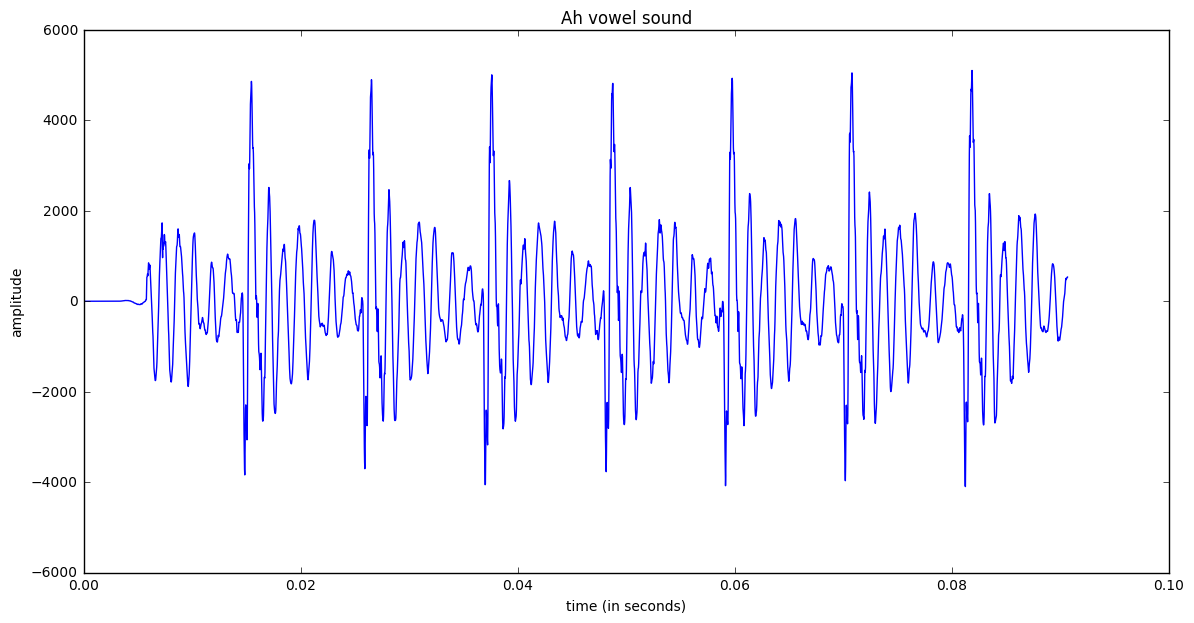

In [77]:
# Seeing sound!¶

# NOTE: This is only works with 1 channel (mono).  To record a mono audio sample,
# you can use this command: rec -r 44100 -c 1 -b 16 test.wav
(sample_rate, input_signal) = scipy.io.wavfile.read("audio/vowel_ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1.0/sample_rate)

setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

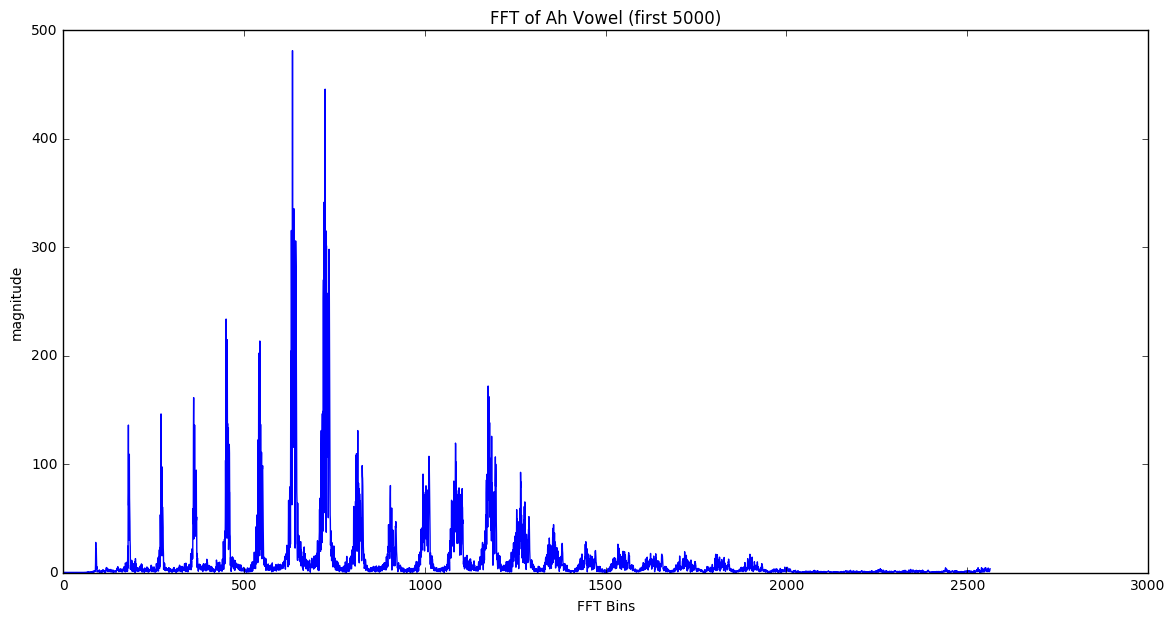

In [78]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Ah Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

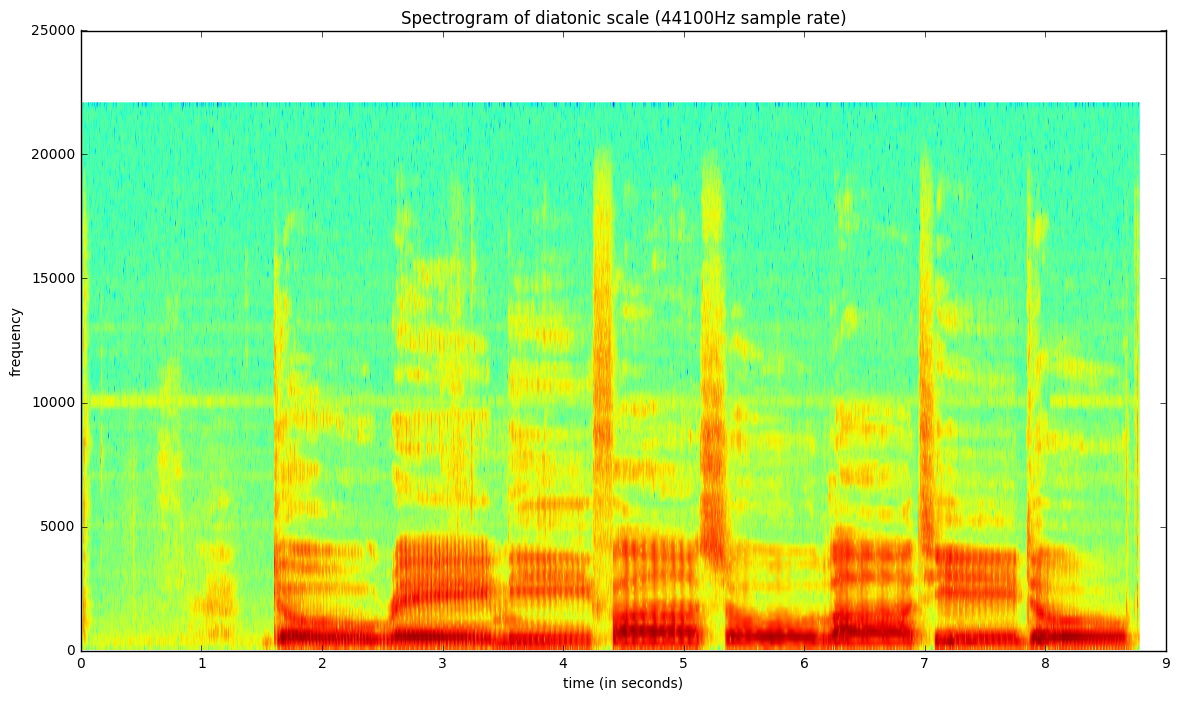

In [81]:
# Spectrogram (FFT over time)¶
# Axes
# x-axis: time
# y-axis: frequency
# z-axis (color): strength of each frequency
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("audio/do-re-mi.wav")
setup_graph(title='Spectrogram of diatonic scale (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=doremi_sample_rate)

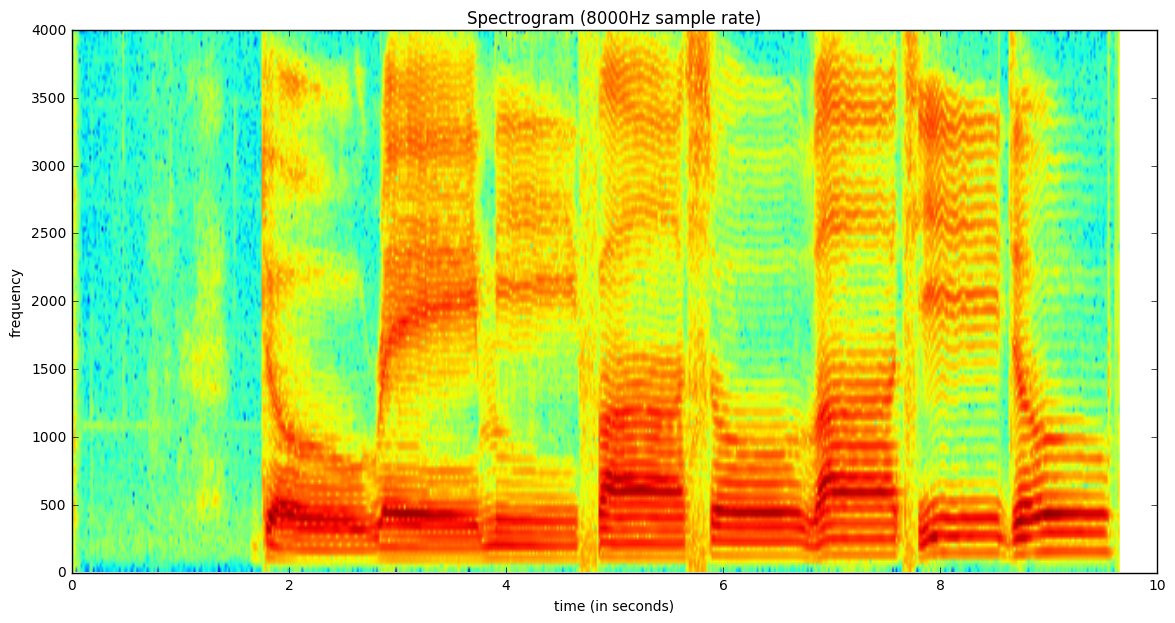

In [82]:
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000)

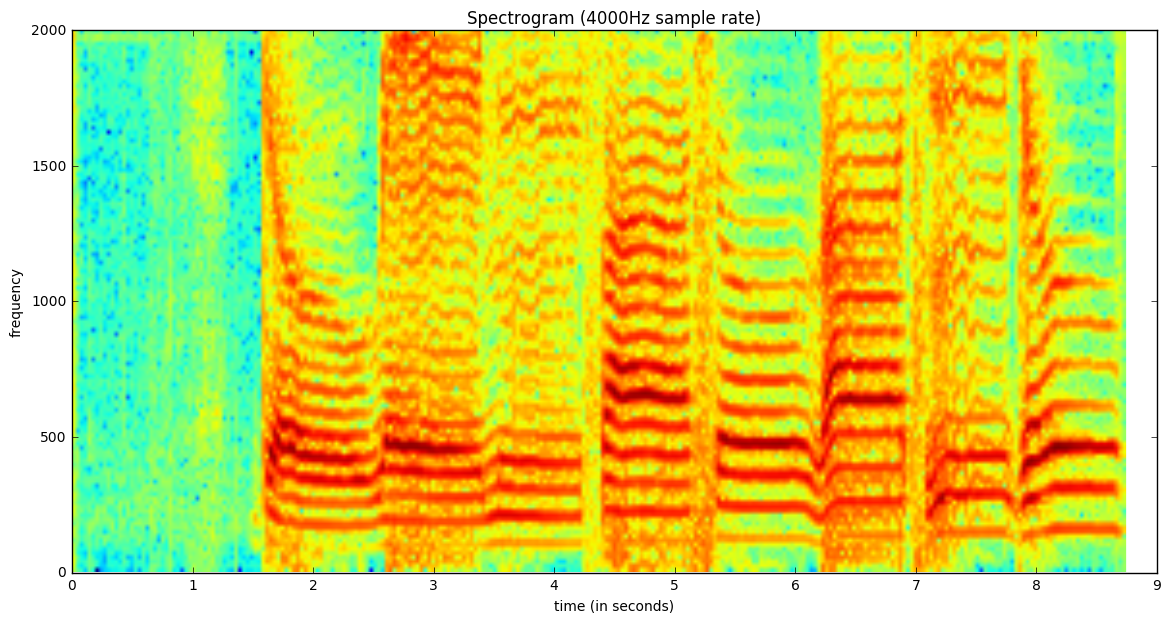

In [83]:
doremi_4000hz = [doremi[i] for i in range(0, len(doremi), 44100//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_4000hz, Fs=4000)

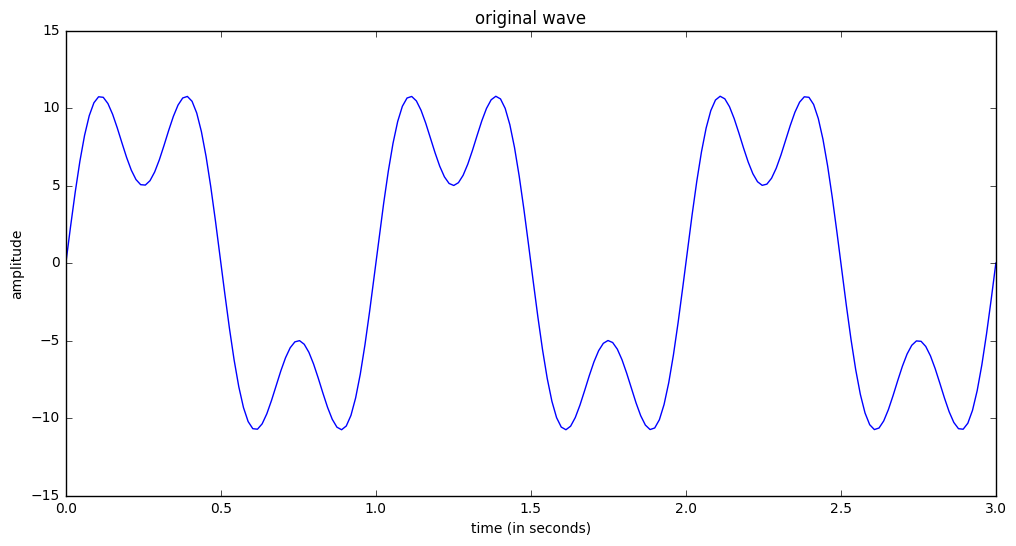

In [48]:
# Wave Deconvolution - Multiplication and Addition
t = np.linspace(0, 3, 200)
freq_1hz_amp_10 = 10 * np.sin(1 * 2*np.pi*t)
freq_3hz_amp_5 =   5 * np.sin(3 * 2*np.pi*t)
complex_wave = freq_1hz_amp_10 + freq_3hz_amp_5

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave)

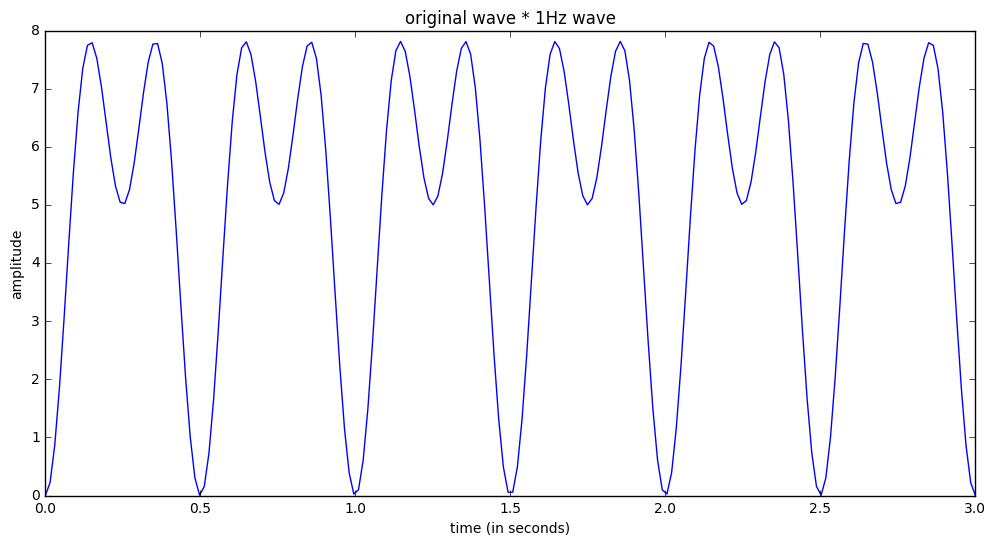

In [49]:
# Multiply complex wave by 1Hz wave
freq_1hz = np.sin(1 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='original wave * 1Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_1hz)

In [53]:
print sum(complex_wave*freq_1hz)

print("Amplitude of 1hz component: ", sum(complex_wave*freq_1hz) * 2.0 * 1.0/len(complex_wave))

995.0
('Amplitude of 1hz component: ', 9.9499999999999993)


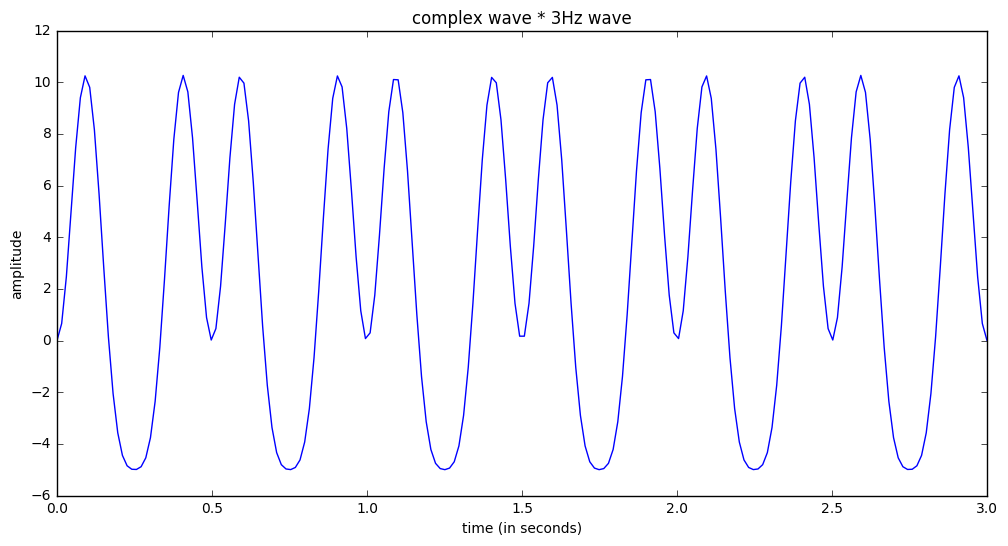

In [54]:
# Multiply complex wave by 3Hz wave
freq_3hz = np.sin(3 * 2*np.pi*t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 3Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_3hz)

In [59]:
print sum(complex_wave*freq_3hz)
print("Amplitude of 3hz component: ", sum(complex_wave*freq_3hz) * 2.0 * 1.0/len(complex_wave))

497.5
('Amplitude of 3hz component: ', 4.9749999999999996)


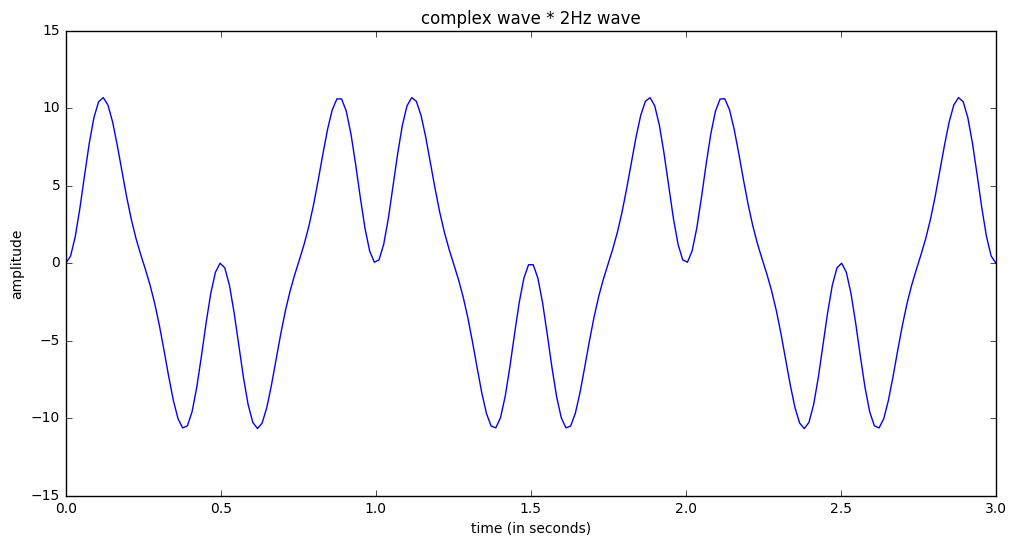

In [57]:
# Multiply complex wave by 2Hz wave

freq_2hz = np.sin(2 * 2*np.pi*t) 
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='complex wave * 2Hz wave', fig_size=(12,6))
_ = plt.plot(t, complex_wave * freq_2hz)

In [60]:
print sum(complex_wave*freq_2hz)
print("Amplitude of 2hz component: ", sum(complex_wave*freq_2hz) * 2.0 * 1.0/len(complex_wave))

1.11521902824e-13
('Amplitude of 2hz component: ', 1.1152190282359699e-15)


In [61]:
# The summation of complex wave multiplied by simple wave of a given frequency leaves us with the "power" of that simple wave.